In [2]:
# 导入相关包
import numpy as np
import pandas as pd
from pandas import plotting

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [14]:
# 导入数据集
iris = pd.read_csv('iris.csv', usecols=[0, 1, 2, 3, 4])

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864']

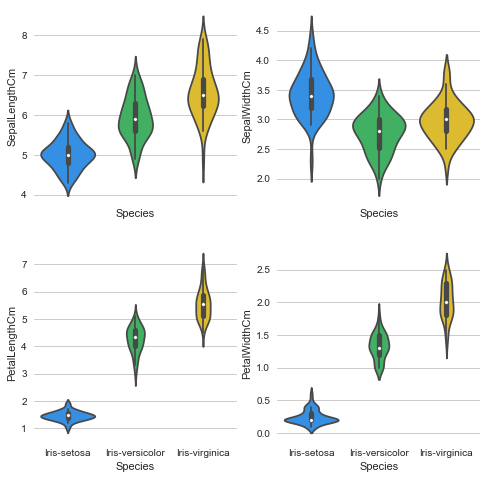

In [19]:
# 绘制  Violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.violinplot(x='Species', y='SepalLengthCm', data=iris, palette=antV, ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalWidthCm', data=iris, palette=antV, ax=axes[0, 1])
sns.violinplot(x='Species', y='PetalLengthCm', data=iris, palette=antV, ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidthCm', data=iris, palette=antV, ax=axes[1, 1])

plt.show()

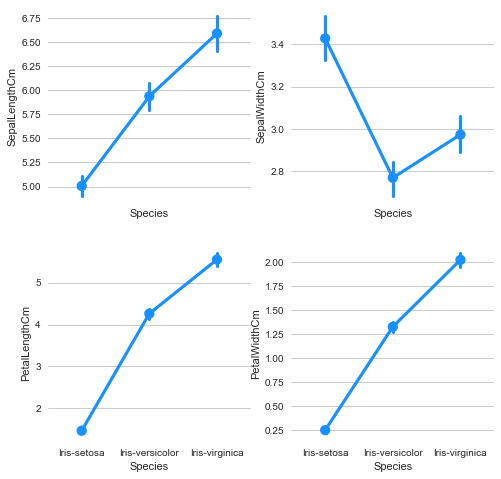

In [20]:
# 绘制  pointplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.pointplot(x='Species', y='SepalLengthCm', data=iris, color=antV[0], ax=axes[0, 0])
sns.pointplot(x='Species', y='SepalWidthCm', data=iris, color=antV[0], ax=axes[0, 1])
sns.pointplot(x='Species', y='PetalLengthCm', data=iris, color=antV[0], ax=axes[1, 0])
sns.pointplot(x='Species', y='PetalWidthCm', data=iris, color=antV[0], ax=axes[1, 1])

plt.show()

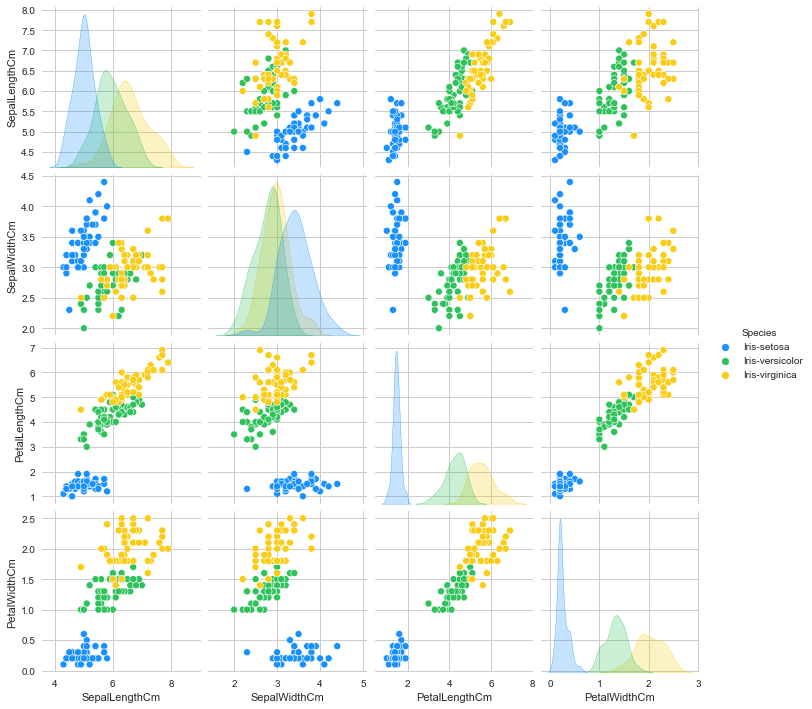

In [42]:
# g = sns.pairplot(data=iris, hue='Species')
g = sns.pairplot(data=iris, palette=antV[0:3], hue='Species')

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:263: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(-np.pi, np.pi))


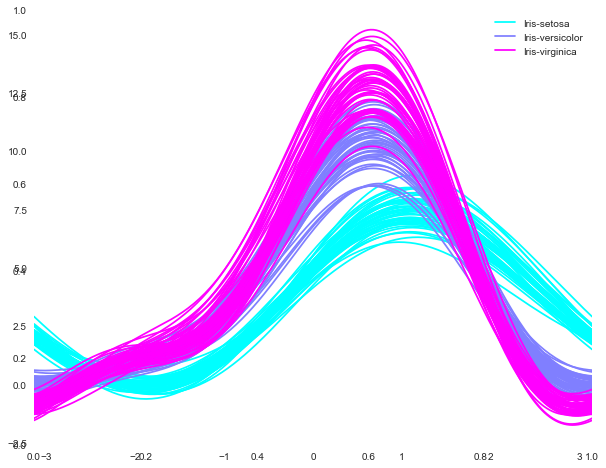

In [26]:
plt.subplots(figsize = (10,8))
plotting.andrews_curves(iris, 'Species', colormap='cool')

plt.show()

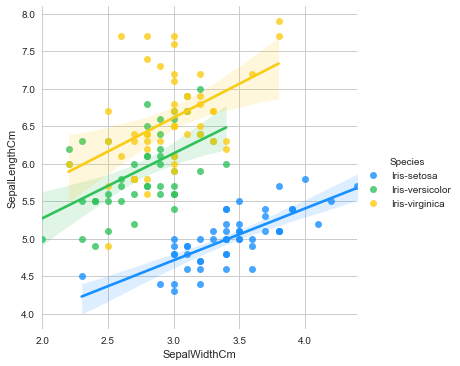

In [27]:
g = sns.lmplot(data=iris, x='SepalWidthCm', y='SepalLengthCm', palette=antV, hue='Species')

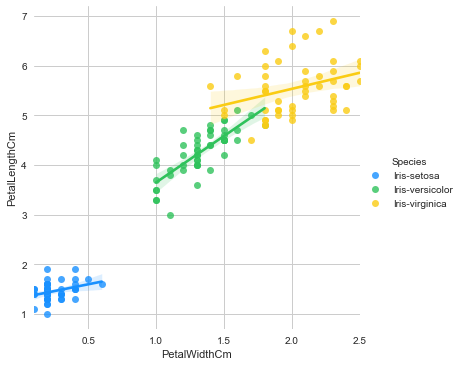

In [28]:
g = sns.lmplot(data=iris, x='PetalWidthCm', y='PetalLengthCm', palette=antV, hue='Species')

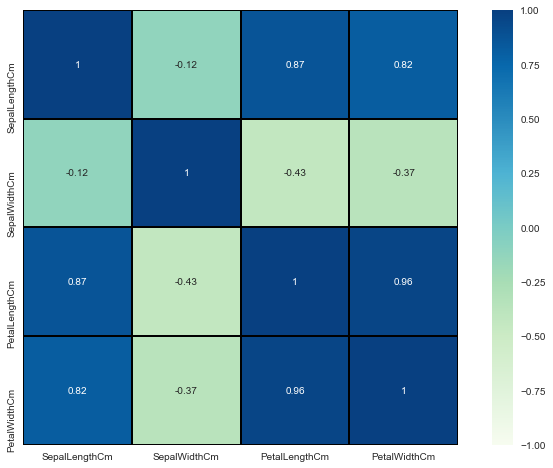

In [29]:
fig=plt.gcf()
fig.set_size_inches(12, 8)
fig=sns.heatmap(iris.corr(), annot=True, cmap='GnBu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

In [30]:
# 载入特征和标签集
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [31]:
# 对标签集进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 101)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(105, 4) (105,) (45, 4) (45,)


In [33]:
# Support Vector Machine
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the SVM is: 0.9777777777777777


In [34]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Logistic Regression is: 0.9777777777777777


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Decision Tree is: 0.9555555555555556


In [36]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the KNN is: 1.0


上面使用了数据集的所有特征，下面将分别使用花瓣和花萼的尺寸：

In [37]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0) 
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

sepal = iris[['SepalLengthCm', 'SepalWidthCm', 'Species']]
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [38]:
model=svm.SVC()

model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [39]:
model = LogisticRegression()

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [40]:
model=DecisionTreeClassifier()

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


In [41]:
model=KNeighborsClassifier(n_neighbors=3) 

model.fit(train_x_p, train_y_p) 
prediction = model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s, train_y_s) 
prediction = model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


从中不难看出，使用花瓣的尺寸来训练数据较花萼更准确。正如在探索性分析的热图中所看到的那样，花萼的宽度和长度之间的相关性非常低，而花瓣的宽度和长度之间的相关性非常高。